<a href="https://colab.research.google.com/github/shiernee/Advanced_ML/blob/main/Week6/WOA7015_Wk6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to WOA7015 Advance Machine Learning Lab - Week 6
This code is generated for the purpose of WOA7015 module.
The code is available in github https://github.com/shiernee/Advanced_ML 


# Section 1: Principal Component Analysis
Facts: 
*   PCA is often used to measure data in term of its principal components rather than on a normal x-y axis
*   Principal components describes the direction of the data in which the variance is the highest / spread out.
*   PCA is a dimensional reduction or data compression method
*   Mathematically, the principal components are the eigen vector of the covariance matrix of orignal datasets. 
*   The principal components (eigen vector) correspond to the direction with the greatest variance in data. 
*   Each eigen vector has a corresponding eigenvalue. The eigenvalue is a scalar value and indicates how much variance there is in the data along that eigenvector. 











In this section, we will write a code to perform PCA. 

In [ ]:
import numpy as np
import pandas as pd
from numpy import linalg as LA
import matplotlib.pyplot as plt

Step 1: Generate the following matrix. 


In [ ]:
# Matrix of orignal data
A = np.matrix([[1,2,3,4],
               [5,5,6,7],
               [1,4,2,3],
               [5,3,2,1],
               [8,1,2,2]])
df = pd.DataFrame(A, columns=['f1', 'f2', 'f3','f4'])
df

,f1,f2,f3,f4
0,1,2,3,4
1,5,5,6,7
2,1,4,2,3
3,5,3,2,1
4,8,1,2,2


In [ ]:
# 1. Standardize data
df_std = (df-df.mean()) / df.std()
df_std

,f1,f2,f3,f4
0,-1.000000,-0.632456,0.000000,0.260623
1,0.333333,1.264911,1.732051,1.563740
2,-1.000000,0.632456,-0.577350,-0.173749
3,0.333333,0.000000,-0.577350,-1.042493
4,1.333333,-1.264911,-0.577350,-0.608121


In [ ]:
# 2. Calculate covariance matrix for the features in the datasets.
covMatrix = np.cov(df_std.to_numpy(), rowvar=0, bias=True)
print('covMatrix')
print(covMatrix)


covMatrix
[[ 0.8        -0.25298221  0.03849002 -0.14479075]
 [-0.25298221  0.8         0.51120772  0.49449803]
 [ 0.03849002  0.51120772  0.8         0.75235479]
 [-0.14479075  0.49449803  0.75235479  0.8       ]]
------------------------------------------------



In [ ]:
# compute eigenvalue
w, v = LA.eig(covMatrix)
print('eigenvalue, ', w)
eigen_df = pd.DataFrame(v, columns=['e1', 'e2', 'e3', 'e4'], index=w)
print(eigen_df)


eigenvalue,  [2.01263459 0.8522308  0.31510964 0.02002497]
                e1        e2        e3        e4
2.012635  0.161960 -0.917059 -0.307071  0.196162
0.852231 -0.524048  0.206922 -0.817319  0.120610
0.315110 -0.585896 -0.320539  0.188250 -0.720099
0.020025 -0.596547 -0.115935  0.449733  0.654547


transform_matrix with 1 principal components
[[ 0.01400331]
 [-2.55653399]
 [-0.05148019]
 [ 1.01415002]
 [ 1.57986086]]
------------------------------------------------

         f1        f2        f3        f4
0  4.006804  2.988397  2.985789  3.380769
1  2.757832  5.118326  5.594377  6.911025
2  3.974987  3.042656  3.052242  3.470701
3  4.492755  2.159683  1.970838  2.007214
4  4.767622  1.690939  1.396753  1.230293
------------------------------------------------

transform_matrix with 2 principal components
[[ 1.40033078e-02  7.55974765e-01]
 [-2.55653399e+00 -7.80431775e-01]
 [-5.14801919e-02  1.25313470e+00]
 [ 1.01415002e+00  2.38808310e-04]
 [ 1.57986086e+00 -1.22891650e+00]]
------------------------------------------------

         f1        f2        f3        f4
0  1.926984  3.235731  2.566079  3.178997
1  4.904938  4.862991  6.027665  7.119324
2  0.527392  3.452646  2.356514  3.136235
3  4.492098  2.159761  1.970705  2.007150
4  8.148588  1.288872  2.079036  1.558294
----

Text(0, 0.5, 'error')

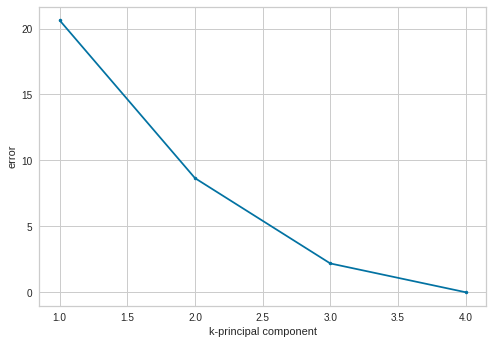

In [ ]:
# tranform dataset to principal component space
err = []
pc=[]
for k in range(1, 5):
  B = v[:, :k]
  B2 = np.matmul(np.transpose(B), B)
  B3 = np.matmul(B2, np.transpose(B))
  transform_mat = np.matmul(df_std.to_numpy(), np.transpose(B3)) 
  print(f"transform_matrix with {k} principal components")
  print(transform_mat)
  print('------------------------------------------------\n')
  

  # transform back to original space
  ori_std_mat = np.matmul(transform_mat, B3)
  ori_std_mat_df = pd.DataFrame(ori_std_mat, columns=['f1', 'f2', 'f3','f4'])
  ori_mat = ori_std_mat_df.multiply(df.std()) + df.mean()
  print(ori_mat)
  print('------------------------------------------------\n')

  err.append(np.sum(np.sum(abs(ori_mat - df))))
  pc.append(k)


plt.plot(pc, err, '.-')
plt.xlabel('k-principal component')
plt.ylabel('error')


In [ ]:
## Try with built in PCA function 

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from numpy import linalg as LA
import matplotlib.pyplot as plt

A = np.matrix([[1,2,3,4],
               [5,5,6,7],
               [1,4,2,3],
               [5,3,2,1],
               [8,1,2,2]])

df = pd.DataFrame(A, columns=['f1', 'f2', 'f3','f4'])
df_std = (df-df.mean()) / df.std()

covMatrix = np.cov(df_std.to_numpy(), rowvar=0, bias=True)
print('covMatrix')
print(covMatrix)
print('------------------------------------------------\n')

err=[]
pc=[]
for k in range(1, 5):
  print('k:', k)
  pca = PCA(n_components=k)
  principalComponent = pca.fit_transform(df_std)
  principalDf = pca.fit_transform(df_std)
  print(np.sum(pca.explained_variance_ratio_) )
  temp = pca.inverse_transform(principalDf) ## uses PCA function 
  ori_std_mat_df = pd.DataFrame(temp, columns=['f1', 'f2', 'f3','f4'])
  ori_mat = ori_std_mat_df.multiply(df.std()) + df.mean()
  print(ori_mat)
  
  err.append(np.sum(np.sum(abs(ori_mat - df))))
  pc.append(k)

plt.plot(pc, err, '.-')
plt.xlabel('k-principal component')
plt.ylabel('error')

## As k increases, this means that more data is retained and thus, the error reduces

## Section 2 : Try with dummy data

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
sns.set()
%matplotlib inline

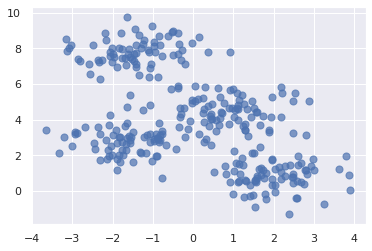

In [ ]:
# generate the coordinate pairs
points, cluster_indexes = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=0)
 
x = points[:, 0]
y = points[:, 1]
 
plt.scatter(x, y, s=50, alpha=0.7)

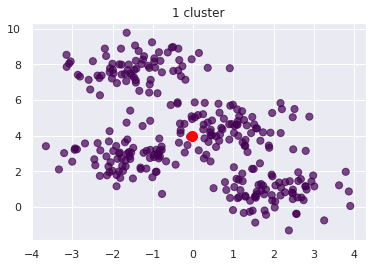

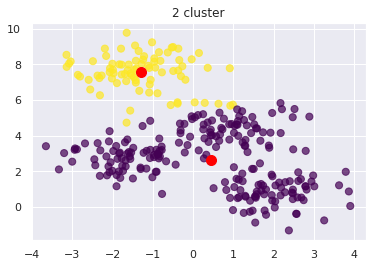

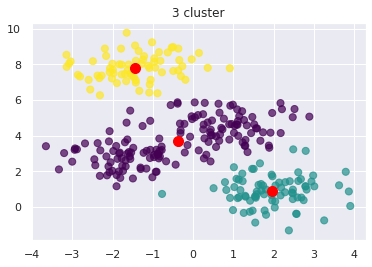

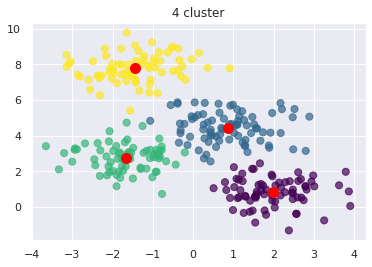

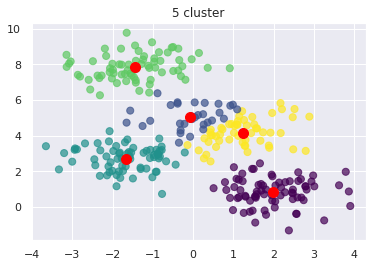

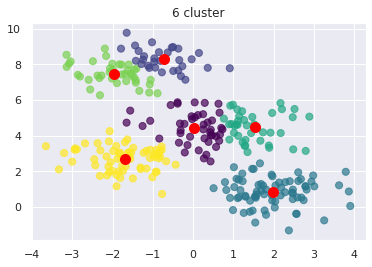

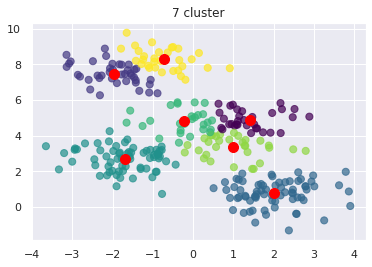

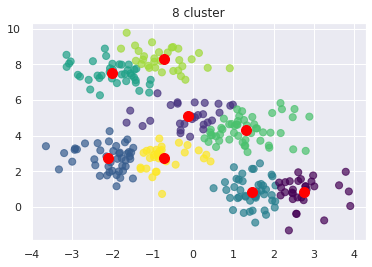

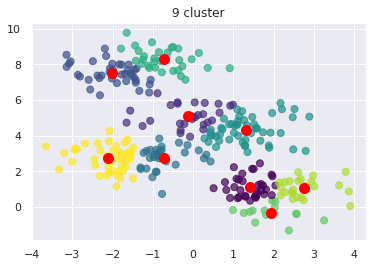

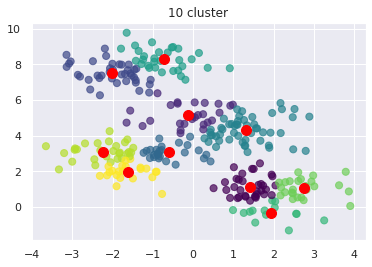

In [ ]:
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, random_state=0)
  kmeans.fit(points)
  predicted_cluster_indexes = kmeans.predict(points)
  
  plt.figure()
  plt.title(f'%d cluster' % (k))
  plt.scatter(x, y, c=predicted_cluster_indexes, s=50, alpha=0.7, cmap='viridis')
  
  centers = kmeans.cluster_centers_
  plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100)
  

Text(0, 0.5, 'Inertia')

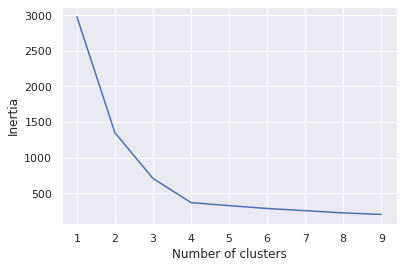

In [ ]:
inertias = []
 
for i in range(1, 10):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(points)
  inertias.append(kmeans.inertia_)
 
plt.plot(range(1, 10), inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

# Case study of Faces recognition example using SVMs

In this section,  we will implement a face recognition algorithm using these methods with `scikit-learn`. We will use the image dataset [Labeled Faces in the Wild](http://vis-www.cs.umass.edu/lfw/lfw.pdf) (LFW), which contains images with labels. We will use a fraction of these images to train an **SVM** classifier and try to predict unseen images. Before doing that we will use *PCA* to reduce the dimensionality of the images, and then use those for our model. 




In [8]:
# import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [3]:
# Download the data and load it in as a set of numpy arrays
# min_faces_per_person limits the dataset to have the image with at least that amount
lfw_people = fetch_lfw_people(min_faces_per_person=60, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the ID of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print ("Total dataset size:")
print ("n_samples: %d" % n_samples)
print ("n_features: %d" % n_features)
print ("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1140
n_features: 1850
n_classes: 5


([], <a list of 0 Text major ticklabel objects>)

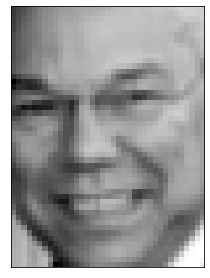

In [13]:
## Look at the data
visualize_face = np.random.randint(0, n_samples)

# Plotting the grey image of the above index
plt.figure(figsize=(3.6, 4.8))
plt.imshow(X[visualize_face].reshape((h, w)), cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())

In [28]:
# split into a training (80%) and testing (20%) set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Apply PCA to X features, we can change the n_components later 
n_components = 150

print("Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]))

pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)

# reconstructing the images from pca output --> eigenfaces
eigenfaces = pca.components_.reshape((n_components, h, w))

# Applying pca to training and test set
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

Extracting the top 150 eigenfaces from 855 faces


In [26]:
# Train SVM model with PCA components

print("Fitting the classifier to the training set")

# Hyperparameter Tuning
## parameters C and gamma for SVM, see lecture 10 for more explanation
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5], 'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }

# Creating SVM classifier with GridSearch
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, cv=5, n_jobs=3)

# Training our classfier
clf = clf.fit(X_train_pca, y_train)

print("Best estimator found by grid search: \n{}".format(clf.best_estimator_))


Fitting the classifier to the training set
Best estimator found by grid search: 
SVC(C=1000.0, class_weight='balanced', gamma=0.005)


In [27]:
# Evaluation of the model quality on the test set
print("Predicting people's names on the test set\n")
# Predictin for the test set
y_pred = clf.predict(X_test_pca)

# Prediction results
print(classification_report(y_test, y_pred, target_names=target_names))

Predicting people's names on the test set

                   precision    recall  f1-score   support

     Colin Powell       0.92      0.94      0.93        64
  Donald Rumsfeld       0.96      0.81      0.88        32
    George W Bush       0.87      0.96      0.91       127
Gerhard Schroeder       0.96      0.83      0.89        29
       Tony Blair       0.96      0.82      0.89        33

         accuracy                           0.91       285
        macro avg       0.94      0.87      0.90       285
     weighted avg       0.91      0.91      0.91       285



## Look at the prediction 



In [19]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=5):
    """Helper function to plot a gallery of portraits
    
       inputs:
          images (numpy array) : array of images that we want to show
          titles (string array) : 
          h (int) : height of the image
          w (int) : width of the image
          n_row (int) :
          n_col (int) :
    """
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
        

def title(y_pred, y_test, target_names, i):
    """Helper function to generate the title
    inputs:
      y_pred : List of predictions 
      y_test : 
    
    outputs:
    """
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)


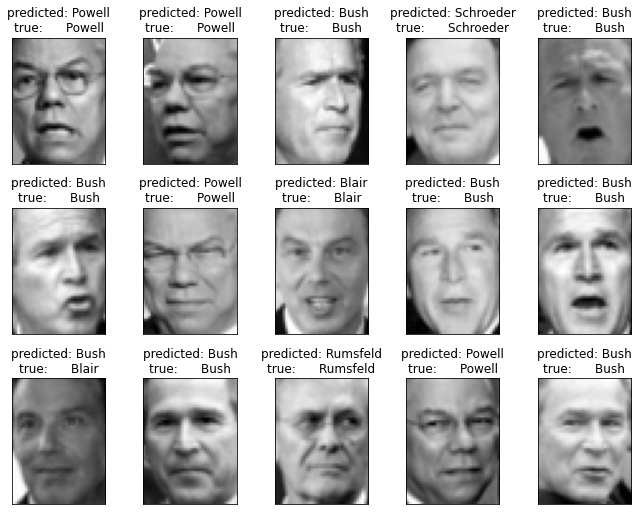

In [20]:
# Generate titles with predicted and true labels for the images
prediction_titles = [title(y_pred, y_test, target_names, i) for i in range(y_pred.shape[0])]
# Call the plot function with necessary parameters
plot_gallery(X_test, prediction_titles, h, w)

plt.show()

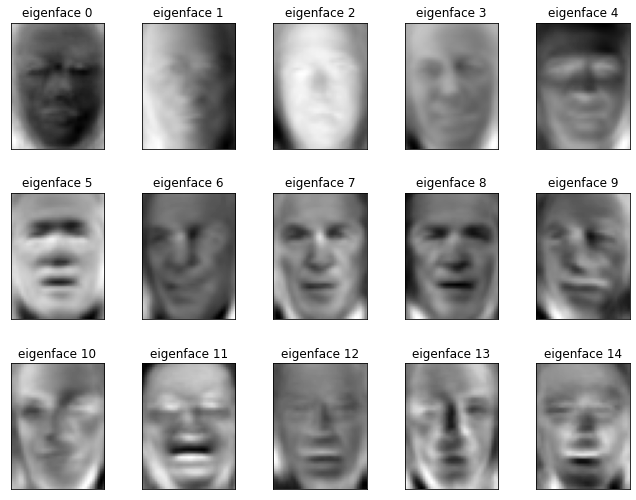

In [21]:
# plot the gallery of the most significative eigenfaces
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]

plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

## Now is your turn
Try to re run the code above and answer the following questions

In [ ]:
#@title Exercise: Which PCA components give the best results?
Answer = "Choose your answer" #@param ["Choose your answer", "n_components = 50", "n_components = 100", "n_components = 150"]

In [ ]:
#@title Exercise: Why?
Answer = "Type your answer here" #@param {type :'string'}

# Exercise (10%)


In [ ]:
#@title Q1: The purpose of PCA is  for?
Answer = "Choose your answer" #@param ["Choose your answer", "Normalize Variance", "Augment Data", "Reduce Dimensionality"]

In [ ]:
#@title Q2:  Given pca1 and pca2 are both principal components vectors, which of the following statement is correct?
Answer = "Choose your answer" #@param ["Choose your answer", "pca1 is parallel to pca2", "pca1 is orthogonal to pca2", "variance along pca1 is smaller than variance along pca2"]

In [ ]:
#@title Q3:  Which of the following tasks can be best solved using Clustering?
Answer = "Choose your answer" #@param ["Choose your answer", "Predicting the amount of rainfall based on various factors", "Training a robot to play a chess", "Detecting fraudulent credit card transactions", "All of the above"]

In [ ]:
#@title Q4:  Which of the following is required by K-means clustering?
Answer = "Choose your answer" #@param ["Choose your answer", "Distance Metric", "Number of Clusters", "Initial Guess of Cluster Centroids", "All of the above"]

In [ ]:
#@title Q5 Which of the clustering algorithm is most sensitive to outliers??
Answer = "Choose your answer" #@param ["Choose your answer", "K-means clustering algorithm ", "K-modes clustering algorithm ", "K-medians clustering algorithm "]

# Submission Instructions
Once you are finished, follow these steps:

Restart the kernel and re-run this notebook from beginning to end by going to Kernel > Restart Kernel and Run All Cells.
If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.
Double check that there is a number next to each code cell and that these numbers are in order.
Then, submit your lab as follows:

Go to File > Print > Save as PDF.
Double check that the entire notebook, from beginning to end, is in this PDF file. Make sure Solution for Exercise 5 are in for marks. 
Upload the PDF to Spectrum. 

# References:
1. https://www.wintellect.com/unsupervised-learning-with-k-means-clustering-part-ii/ 

2. https://www.kaggle.com/halflingwizard/interpret-k-means-clusters-on-credit-card-dataset#Conclusion

3. https://www.kaggle.com/halflingwizard/interpret-k-means-clusters-on-credit-card-dataset/notebook#Preprocessing

4. https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html 